In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import pyecharts
from matplotlib import rcParams
import seaborn as sns
import datetime

rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

In [289]:
data = pd.read_excel('UserBehavior.xlsx')

In [290]:
data['time1'] = pd.to_datetime(data['timestamp'], unit='s')
data['日期'] = data['time1'].dt.date
data['年_月'] = data['time1'].apply(lambda x: x.strftime('%Y-%m'))
data['时'] = data['time1'].dt.hour

In [291]:
data.isnull().sum()

user_id        0
goods_id       0
category_id    0
behavior       0
timestamp      0
sex            0
address        0
device         0
price          0
amount         0
time1          0
日期             0
年_月            0
时              0
dtype: int64

In [292]:
data

,user_id,goods_id,category_id,behavior,timestamp,sex,address,device,price,amount,time1,日期,年_月,时
0,866796,5002615,2520377,pv,1656991385.00,0,成都,Redmi Note8Pro,0.00,0,2022-07-05 03:23:05.000000238,2022-07-05,2022-07,3
1,866796,2734026,4145813,pv,1656994184.00,0,成都,Redmi Note8Pro,0.00,0,2022-07-05 04:09:44.000000000,2022-07-05,2022-07,4
2,866796,5002615,2520377,pv,1656996273.00,0,成都,Redmi Note8Pro,0.00,0,2022-07-05 04:44:33.000000000,2022-07-05,2022-07,4
3,866796,3239041,2355072,pv,1657007664.00,0,成都,Redmi Note8Pro,0.00,0,2022-07-05 07:54:23.999999762,2022-07-05,2022-07,7
4,866796,4615417,4145813,pv,1657022864.00,0,成都,Redmi Note8Pro,0.00,0,2022-07-05 12:07:44.000000000,2022-07-05,2022-07,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757560,9998,784501,167871,pv,1657448227.00,1,珠海,荣耀10青春版,0.00,0,2022-07-10 10:17:07.000000000,2022-07-10,2022-07,10
757561,9998,826797,2070852,pv,1657454617.00,1,珠海,荣耀10青春版,0.00,0,2022-07-10 12:03:37.000000000,2022-07-10,2022-07,12
757562,9998,4840025,3702593,pv,1657459280.00,1,珠海,荣耀10青春版,0.00,0,2022-07-10 13:21:20.000000000,2022-07-10,2022-07,13
757563,9998,2798449,1725832,pv,1657459379.00,1,珠海,荣耀10青春版,0.00,0,2022-07-10 13:22:58.999999762,2022-07-10,2022-07,13


In [293]:
pd.set_option('float_format', lambda x: '%.2f' % x)
type_value = data.behavior.value_counts()
type_value

behavior
pv      679668
cart     42714
fav      20601
buy      14582
Name: count, dtype: int64

In [294]:
print('每日操作数',type_value / len(data.日期.unique()))
print('人均操作数',type_value / len(data.user_id.unique()))

每日操作数 behavior
pv     97095.43
cart    6102.00
fav     2943.00
buy     2083.14
Name: count, dtype: float64
人均操作数 behavior
pv     63.29
cart    3.98
fav     1.92
buy     1.36
Name: count, dtype: float64


In [295]:
pv = pd.pivot_table(data, index='日期', values='user_id', aggfunc='count');pv

,user_id
日期,
2022-07-04,12042
2022-07-05,107035
2022-07-06,110951
2022-07-07,115649
2022-07-08,125253
2022-07-09,155347
2022-07-10,131288


In [296]:
uv = data[['user_id','日期']].drop_duplicates()['日期'].value_counts().rename('action_count');uv

日期
2022-07-09    10220
2022-07-10     9952
2022-07-08     8191
2022-07-07     7900
2022-07-06     7797
2022-07-05     7558
2022-07-04     1763
Name: action_count, dtype: int64

In [297]:
uv.rename_axis('日期').sort_index()
arg_pv = (pv['user_id'] / uv).rename('arg_pv');arg_pv

日期
2022-07-04    6.83
2022-07-05   14.16
2022-07-06   14.23
2022-07-07   14.64
2022-07-08   15.29
2022-07-09   15.20
2022-07-10   13.19
Name: arg_pv, dtype: float64

In [298]:
pd.merge(pd.merge(pv, uv, on='日期'), arg_pv, on='日期')

,user_id,action_count,arg_pv
日期,,,
2022-07-04,12042,1763,6.83
2022-07-05,107035,7558,14.16
2022-07-06,110951,7797,14.23
2022-07-07,115649,7900,14.64
2022-07-08,125253,8191,15.29
2022-07-09,155347,10220,15.20
2022-07-10,131288,9952,13.19


<Axes: xlabel='日期'>

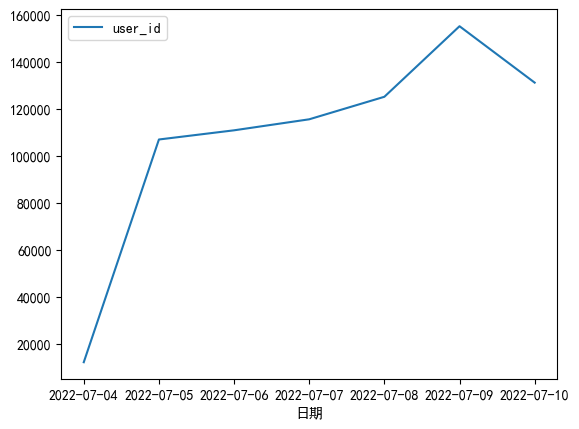

In [299]:
pv.plot(legend=True)

<Axes: xlabel='日期'>

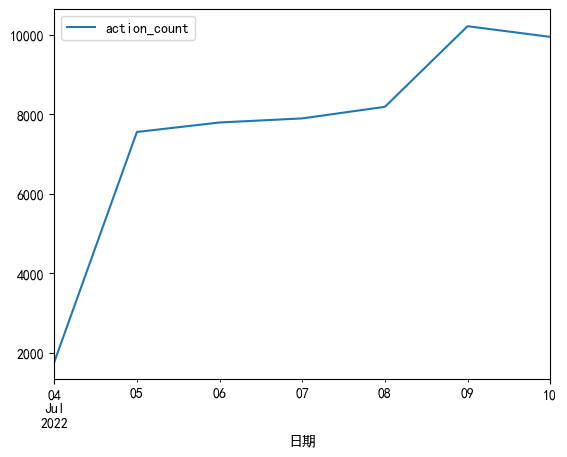

In [300]:
uv.index = pd.to_datetime(uv.index)
uv = uv.sort_index(ascending=True)
uv.plot(legend=True)

In [301]:
buy_click = data[data.behavior=='buy'].groupby('日期').size().rename('buy')
cart_click = data[data.behavior=='cart'].groupby('日期').size().rename('cart')
fav_click = data[data.behavior=='fav'].groupby('日期').size().rename('fav')
pv_click = data[data.behavior=='pv'].groupby('日期').size().rename('pv')
df = pd.concat([buy_click, cart_click, fav_click, pv_click], axis=1)
df['all'] = df.sum(axis=1)
df

,buy,cart,fav,pv,all
日期,,,,,
2022-07-04,155,645,356,10886,12042
2022-07-05,2238,5831,2969,95997,107035
2022-07-06,2338,6092,3083,99438,110951
2022-07-07,2336,6417,3097,103799,115649
2022-07-08,2226,7154,3384,112489,125253
2022-07-09,2845,8946,4137,139419,155347
2022-07-10,2444,7629,3575,117640,131288


In [302]:
from pyecharts.charts import Line, Funnel
from pyecharts import options as opts
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK
df.index = pd.to_datetime(df.index)
line = (
    Line()
    .add_xaxis(df.index.strftime('%Y-%m-%d').tolist())  # 日期作为 x 轴
    .add_yaxis('pv', df['pv'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('buy', df['buy'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('cart', df['cart'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('fav', df['fav'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户每日行为分析"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="日期",
            axislabel_opts=opts.LabelOpts(rotate=45)  # 使用 rotate 参数旋转标签
        ),
        yaxis_opts=opts.AxisOpts(name="行为数量"),
        tooltip_opts=opts.TooltipOpts(trigger="axis")
    )
)
line.load_javascript()

In [303]:
line.render_notebook()

In [304]:
clock_buy_click = data[data.behavior=='buy'].groupby('时').size().rename('buy')
clock_cart_click = data[data.behavior=='cart'].groupby('时').size().rename('cart')
clock_fav_click = data[data.behavior=='fav'].groupby('时').size().rename('fav')
clock_pv_click = data[data.behavior=='pv'].groupby('时').size().rename('pv')
clock_df = pd.concat([clock_buy_click, clock_cart_click, clock_fav_click, clock_pv_click], axis=1)
clock_df['all'] = clock_df.sum(axis=1)
clock_df

,buy,cart,fav,pv,all
时,,,,,
0,509,1422,710,22625,25266
1,664,1751,911,27558,30884
2,976,2062,1118,32577,36733
3,856,1982,1027,32249,36114
4,917,2184,983,32991,37075
5,935,2156,1093,35211,39395
6,856,2111,1077,34528,38572
7,871,2160,1208,37146,41385
8,857,2296,1095,35403,39651


In [305]:
line2 = (
    Line()
    .add_xaxis(clock_df.index.tolist())  # 日期作为 x 轴
    .add_yaxis('pv', clock_df['pv'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('buy', clock_df['buy'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('cart', clock_df['cart'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('fav', clock_df['fav'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户时间段行为分析"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="时间",
            axislabel_opts=opts.LabelOpts(rotate=45)  # 使用 rotate 参数旋转标签
        ),
        yaxis_opts=opts.AxisOpts(name="行为数量"),
        tooltip_opts=opts.TooltipOpts(trigger="axis")
    )
)
line2.load_javascript()

In [306]:
line2.render_notebook()

In [307]:
df['weekday'] = [datetime.datetime.isoweekday(datetime.date(x.year, x.month, x.day))   for x in df.index]
df

,buy,cart,fav,pv,all,weekday
日期,,,,,,
2022-07-04,155,645,356,10886,12042,1
2022-07-05,2238,5831,2969,95997,107035,2
2022-07-06,2338,6092,3083,99438,110951,3
2022-07-07,2336,6417,3097,103799,115649,4
2022-07-08,2226,7154,3384,112489,125253,5
2022-07-09,2845,8946,4137,139419,155347,6
2022-07-10,2444,7629,3575,117640,131288,7


In [308]:
line3 = (
    Line()
    .add_xaxis(range(1,8))
    .add_yaxis('pv', df['pv'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('buy', df['buy'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('cart', df['cart'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .add_yaxis('fav', df['fav'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(width=2))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="客户每日行为分析"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            name="星期",
            axislabel_opts=opts.LabelOpts(rotate=45)
        ),
        yaxis_opts=opts.AxisOpts(name="行为数量"),
        tooltip_opts=opts.TooltipOpts(trigger="axis")
    )
)
line3.load_javascript()

In [309]:
line3.render_notebook()

In [327]:
user_data_act = data[['user_id', '日期', 'behavior']].groupby(by=['user_id', 'behavior']).count()
user_data_act.columns = ['操作次数']
usr_action_count = user_data_act.groupby('user_id')['操作次数'].sum()
action_count = usr_action_count.reset_index().groupby(['操作次数']).size().reset_index(name='人数')
active_count = action_count[action_count.操作次数 >= 3]
active_count

,操作次数,人数
2,3,29
3,4,67
4,5,64
5,6,83
6,7,111
...,...,...
366,487,1
367,502,1
368,510,1
369,517,1


<Axes: xlabel='操作次数'>

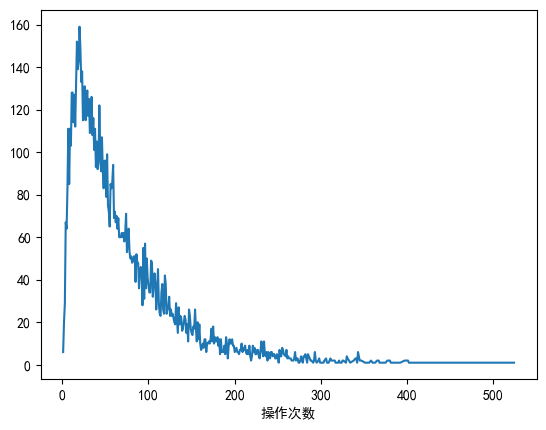

In [313]:
usr_action_count.value_counts().sort_index().plot()

In [314]:
new_visitor = data[["user_id","日期"]].groupby("user_id").min()["日期"].value_counts()
new_visitor = new_visitor.reset_index()
new_visitor = new_visitor.sort_values(by='日期')
print(new_visitor)
new_visitor.columns=["日期","new visitor"]

           日期  count
1  2022-07-04   1763
0  2022-07-05   6074
2  2022-07-06   1639
3  2022-07-07    673
4  2022-07-08    358
5  2022-07-09    229
6  2022-07-10      3


<Axes: xlabel='日期'>

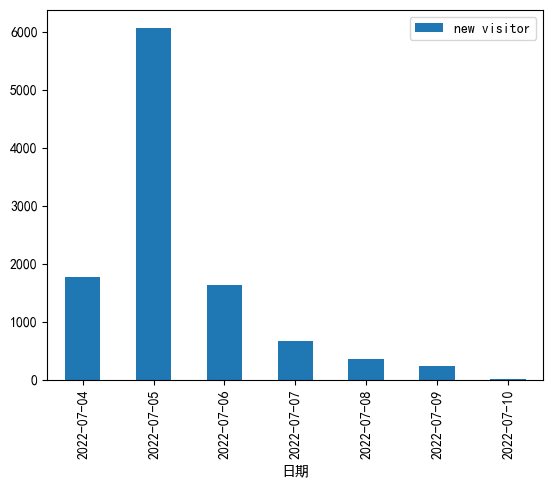

In [315]:
new_visitor.plot.bar(x='日期', y='new visitor')

In [316]:
buy_df = data[data['behavior'] == 'buy']
buy_count = buy_df.groupby(['user_id']).size().reset_index(name='buy_count')

In [317]:
res = buy_count['buy_count'].value_counts()
res = res.reset_index()
num = res.iloc[:,1].sum()
res['人数占比'] = res.iloc[:,1] / num
res.columns=["购买次数","人数","人数占比"]
res

,购买次数,人数,人数占比
0,1,2689,0.44
1,2,1534,0.25
2,3,808,0.13
3,4,415,0.07
4,5,245,0.04
5,6,145,0.02
6,7,87,0.01
7,8,58,0.01
8,9,39,0.01
9,10,24,0.00


In [318]:
df = buy_df.sort_values(by=['user_id', '日期'])
df['日期'] = pd.to_datetime(df['日期'])
df['time_diff'] = df.groupby('user_id')['日期'].diff().dt.days
df['time_diff'] = df['time_diff'].fillna(0)
df


,user_id,goods_id,category_id,behavior,timestamp,sex,address,device,price,amount,time1,日期,年_月,时,time_diff
328652,2,3730891,2865017,buy,1657005505.00,1,珠海,荣耀10青春版,89.10,2,2022-07-05 07:18:25.000000000,2022-07-05,2022-07,7,0.00
328653,2,4681233,1849958,buy,1657005505.00,1,珠海,荣耀10青春版,23.30,4,2022-07-05 07:18:25.000000000,2022-07-05,2022-07,7,0.00
328656,2,1161905,2925160,buy,1657257022.00,1,珠海,荣耀10青春版,90.50,2,2022-07-08 05:10:22.000000000,2022-07-08,2022-07,5,3.00
328665,2,1066723,3439012,buy,1657366474.00,1,珠海,荣耀10青春版,72.30,4,2022-07-09 11:34:34.000000000,2022-07-09,2022-07,11,1.00
328666,2,3496752,2885642,buy,1657366474.00,1,珠海,荣耀10青春版,75.20,1,2022-07-09 11:34:34.000000000,2022-07-09,2022-07,11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624564,11078,4128476,4364882,buy,1657464903.00,1,南京,vivo Z5,47.60,1,2022-07-10 14:55:03.000000000,2022-07-10,2022-07,14,0.00
15414,11079,4315980,4719814,buy,1657074034.00,0,佛山,HUAWEI Mate 20,98.00,4,2022-07-06 02:20:33.999999762,2022-07-06,2022-07,2,0.00
15415,11079,2842596,4719814,buy,1657074034.00,0,佛山,HUAWEI Mate 20,59.60,3,2022-07-06 02:20:33.999999762,2022-07-06,2022-07,2,0.00
15485,11079,4611345,155172,buy,1657419597.00,0,佛山,HUAWEI Mate 20,34.50,2,2022-07-10 02:19:56.999999762,2022-07-10,2022-07,2,4.00


In [319]:
frequency = df.groupby('user_id').size().reset_index(name='消费频次')
amount_stats = df.groupby('user_id')['price'].agg(消费金额='sum').reset_index()
interval_stats = df.groupby('user_id')['time_diff'].mean().reset_index(name='平均消费间隔')
result = frequency.merge(amount_stats, on='user_id').merge(interval_stats, on='user_id')
result


,user_id,消费频次,消费金额,平均消费间隔
0,2,7,518.90,0.57
1,4,4,145.00,0.50
2,16,2,70.90,0.50
3,17,1,62.70,0.00
4,20,1,37.90,0.00
...,...,...,...,...
6105,11074,1,94.40,0.00
6106,11075,1,26.10,0.00
6107,11078,1,47.60,0.00
6108,11079,3,192.10,1.33


In [320]:
user_behavior_count = data.behavior.value_counts()
behavior_data = [list(data) for data in zip(user_behavior_count.index, user_behavior_count)]
total = user_behavior_count.sum()
data_with_rate = [(item[0], (item[1] / total) * 100) for item in behavior_data]
data_with_rate

[('pv', np.float64(89.71744998778982)),
 ('cart', np.float64(5.638328064258513)),
 ('fav', np.float64(2.7193706150627337)),
 ('buy', np.float64(1.9248513328889272))]

In [321]:
funnel = (
    Funnel()
    .add(
        "用户转化",
        data_with_rate,
        sort_="descending"  # 按值降序排序
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="用户操作转化漏斗"),
        toolbox_opts=opts.ToolboxOpts(),  # 工具箱
        tooltip_opts=opts.TooltipOpts(trigger="item", formatter="{b}: {c} ({d}%)")
    )
)


In [322]:
funnel.render_notebook()

<Axes: xlabel='goods_id'>

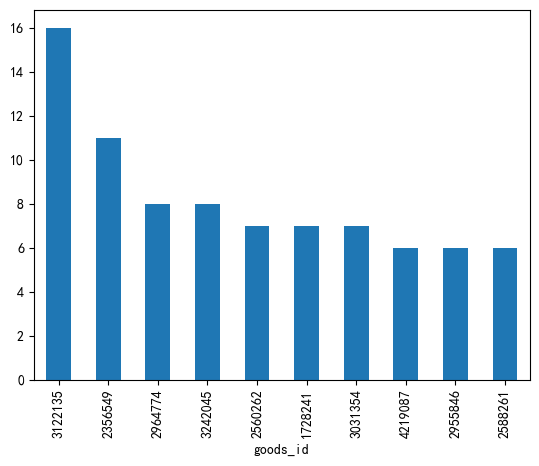

In [323]:
buy_top = buy_df.goods_id.value_counts().head(10)
buy_top.reset_index()
buy_top.plot.bar(x='gooods_id', y='buy_count')

<Axes: xlabel='goods_id'>

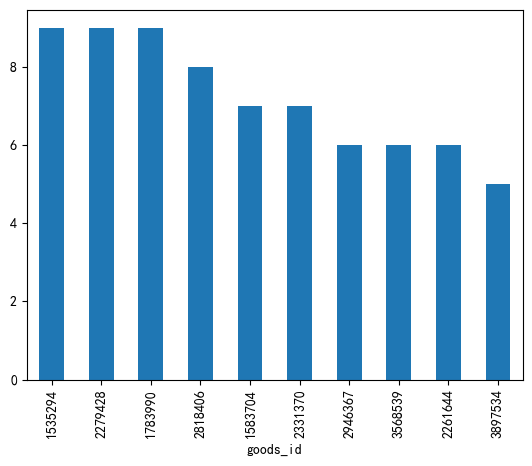

In [324]:
fav_top = data[data['behavior'] == 'fav'].goods_id.value_counts().head(10)
fav_top.reset_index()
fav_top.plot.bar(x='goods_id', y='fav_count')

<Axes: xlabel='address'>

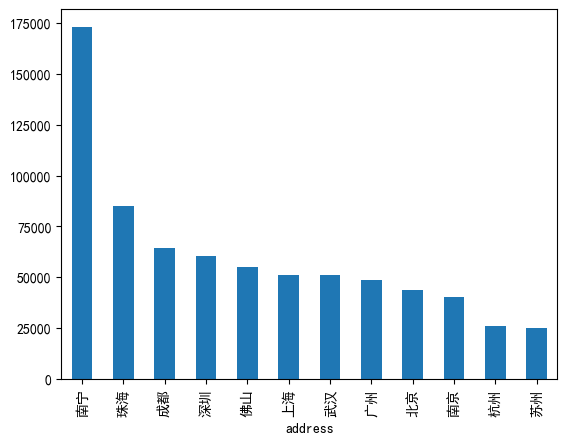

In [325]:
city_top = buy_df.groupby(['address']).price.sum().sort_values(ascending=False)
city_top.plot.bar(x='address', y='price')

<Axes: xlabel='sex'>

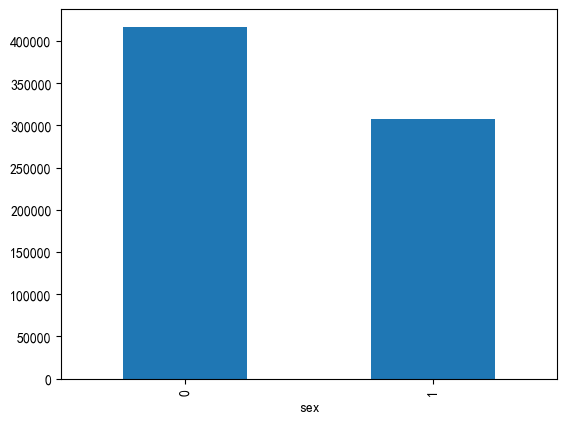

In [326]:
gender_buy = buy_df.groupby(['sex']).price.sum().sort_values(ascending=False)
gender_buy.plot.bar()